<a href="https://colab.research.google.com/github/ShuvoBipul/Assignment-1/blob/main/Heart_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Settings
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/SkillMorph_Dataset/heart.csv')
print("✅ Dataset loaded successfully!")
print(f"\n📊 Dataset Shape: {df.shape}")

✅ Dataset loaded successfully!

📊 Dataset Shape: (1025, 14)


In [4]:
# View first 5 rows
print("📋 First 5 Patients:")
df.head()

📋 First 5 Patients:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# Dataset information
print("📊 Dataset Information:")
df.info()


📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# Statistical summary
print("📈 Statistical Summary:")
df.describe().T

📈 Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [7]:
target_col = 'target' if 'target' in df.columns else 'num'
X = df.drop(target_col, axis=1)
y = df[target_col]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=20,
    stratify=y
)


In [9]:
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True))



Class distribution in training set:
target
1    0.513415
0    0.486585
Name: proportion, dtype: float64

Class distribution in testing set:
target
1    0.512195
0    0.487805
Name: proportion, dtype: float64


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.model_selection import cross_val_score

cv_accuracies = []
for k in range(1, 13):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    cv_accuracies.append(scores.mean())

best_k = cv_accuracies.index(max(cv_accuracies)) + 1
print(f"Best K (CV): {best_k}")


Best K (CV): 1


In [15]:
# Train final KNN model
print(f"\n🤖 Training KNN with K = {best_k}...\n")

knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

print("✅ KNN Model trained!")
print(f"\n📊 KNN Accuracy: {knn_accuracy:.4f} ({knn_accuracy*100:.2f}%)")


🤖 Training KNN with K = 1...

✅ KNN Model trained!

📊 KNN Accuracy: 1.0000 (100.00%)



📋 KNN Classification Report:
                   precision    recall  f1-score   support

 No heart Disease       1.00      1.00      1.00       100
Has Heart Disease       1.00      1.00      1.00       105

         accuracy                           1.00       205
        macro avg       1.00      1.00      1.00       205
     weighted avg       1.00      1.00      1.00       205



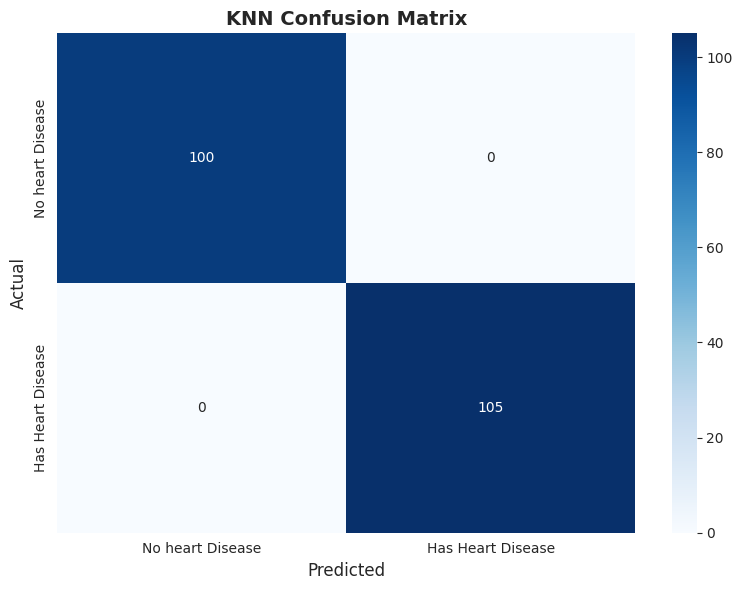

In [16]:
# Evaluation
print("\n📋 KNN Classification Report:")
print("=" * 60)
print(classification_report(y_test, y_pred_knn, target_names=['No heart Disease', 'Has Heart Disease']))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No heart Disease', 'Has Heart Disease'],
            yticklabels=['No heart Disease', 'Has Heart Disease'])
plt.title('KNN Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print("\n" + "="*60)

In [17]:
# Train Decision Tree
print("🌳 Training Decision Tree...\n")

dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,          # Limit depth to avoid overfitting
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

dt_model.fit(X_train, y_train)  # No scaling needed
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

print("✅ Decision Tree trained!")
print(f"\n📊 Decision Tree Accuracy: {dt_accuracy:.4f} ({dt_accuracy*100:.2f}%)")

🌳 Training Decision Tree...

✅ Decision Tree trained!

📊 Decision Tree Accuracy: 0.8780 (87.80%)



📋 Decision Tree Classification Report:
              precision    recall  f1-score   support

     Healthy       0.89      0.85      0.87       100
    Diabetes       0.86      0.90      0.88       105

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



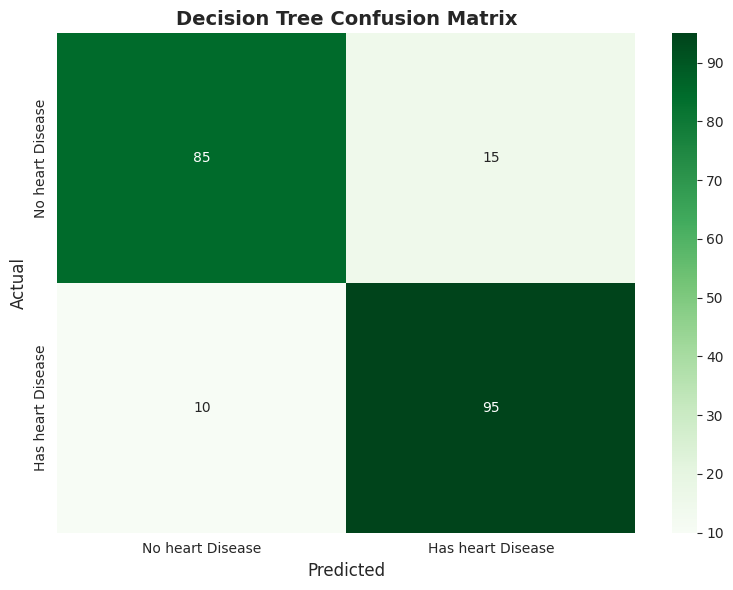

In [18]:
# Evaluation
print("\n📋 Decision Tree Classification Report:")
print("=" * 60)
print(classification_report(y_test, y_pred_dt, target_names=['Healthy', 'Diabetes']))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No heart Disease', 'Has heart Disease'],
            yticklabels=['No heart Disease', 'Has heart Disease'])
plt.title('Decision Tree Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print("\n" + "="*60)


⭐ Feature Importance (Decision Tree):
 Feature  Importance
      cp    0.355658
      ca    0.154352
 oldpeak    0.126743
     age    0.101727
    thal    0.086859
    chol    0.069893
   exang    0.033200
 restecg    0.030115
     sex    0.026146
 thalach    0.010147
trestbps    0.005159
     fbs    0.000000
   slope    0.000000


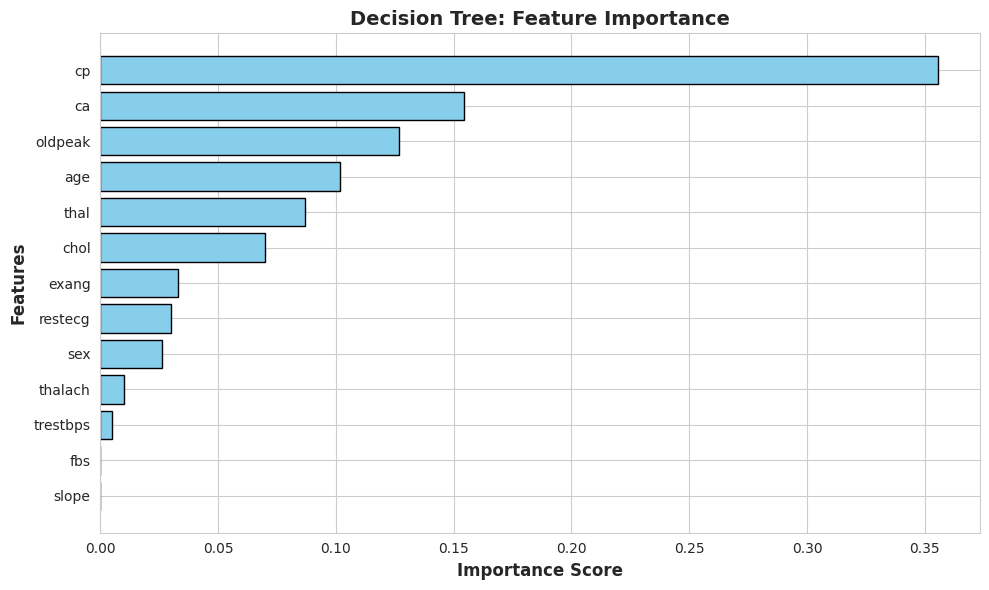


💡 These features are most important for prediction!



In [19]:
# Feature Importance
print("\n⭐ Feature Importance (Decision Tree):")
print("=" * 60)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.to_string(index=False))

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'],
         color='skyblue', edgecolor='black')
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Decision Tree: Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n💡 These features are most important for prediction!")
print("\n" + "="*60)

In [ ]:
# Train Random Forest
print("🌲🌳🌲 Training Random Forest...\n")

rf_model = RandomForestClassifier(
    n_estimators=100,     # 100 trees
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1             # Use all CPU cores
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("✅ Random Forest trained!")
print(f"   → {rf_model.n_estimators} trees created")
print(f"   → Each tree votes")
print(f"\n📊 Random Forest Accuracy: {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")

🌲🌳🌲 Training Random Forest...

✅ Random Forest trained!
   → 100 trees created
   → Each tree votes

📊 Random Forest Accuracy: 0.8976 (89.76%)


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1️⃣ Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 2️⃣ Make predictions
y_pred_rf = rf.predict(X_test)

# 3️⃣ Print classification report
print("\n📋 Random Forest Classification Report:")
print("=" * 60)
print(classification_report(y_test, y_pred_rf,
                            target_names=['No heart Disease', 'Has heart Disease']))

# 4️⃣ Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


📋 Random Forest Classification Report:
                   precision    recall  f1-score   support

 No heart Disease       1.00      1.00      1.00       100
Has heart Disease       1.00      1.00      1.00       105

         accuracy                           1.00       205
        macro avg       1.00      1.00      1.00       205
     weighted avg       1.00      1.00      1.00       205


Confusion Matrix:
[[100   0]
 [  0 105]]


In [24]:
from sklearn.metrics import accuracy_score

# KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)

In [26]:
from sklearn.metrics import accuracy_score
import pandas as pd

# Calculate accuracies
knn_accuracy = accuracy_score(y_test, y_pred_knn)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Compare all models
print("\n🏆 FINAL MODEL COMPARISON")
print("=" * 60)

comparison = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree', 'Random Forest'],
    'Accuracy': [knn_accuracy, dt_accuracy, rf_accuracy]
})

# Add percentage column
comparison['Accuracy %'] = (comparison['Accuracy'] * 100).round(2).astype(str) + '%'

# Sort by best accuracy
comparison = comparison.sort_values('Accuracy', ascending=False)

print("\n" + comparison.to_string(index=False))

# Identify winner
best_model = comparison.iloc[0]['Model']
best_acc = comparison.iloc[0]['Accuracy']

print(f"\n🥇 WINNER: {best_model}")
print(f"   Accuracy: {best_acc:.4f} ({best_acc*100:.2f}%)")
print("\n" + "="*60)


🏆 FINAL MODEL COMPARISON

        Model  Accuracy Accuracy %
          KNN  1.000000     100.0%
Random Forest  1.000000     100.0%
Decision Tree  0.878049      87.8%

🥇 WINNER: KNN
   Accuracy: 1.0000 (100.00%)



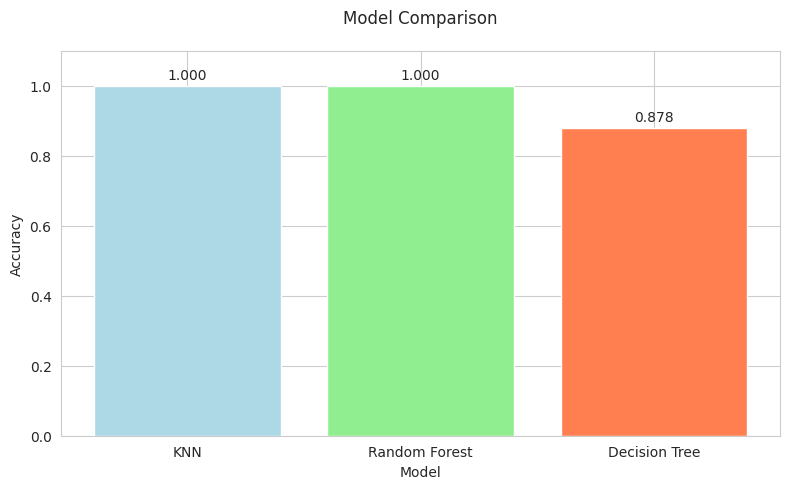

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.bar(comparison['Model'], comparison['Accuracy'],
        color=['lightblue', 'lightgreen', 'coral'])

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison', pad=20)   # Add space above plot

plt.ylim(0, 1.1)   # Increase upper limit for breathing space

# Add values on bars
for i, acc in enumerate(comparison['Accuracy']):
    plt.text(i, acc + 0.02, f'{acc:.3f}', ha='center')

plt.tight_layout()
plt.show()